In [11]:
import datetime
import pandas as pd
from openpyxl import load_workbook
from openpyxl.styles import Font, PatternFill

today = '20200220'
date_today = datetime.datetime.strptime(today,'%Y%m%d')

style_map = {
    '银行':        'db5f57',
    '全国地产':      'db6657',
    '生物制药':      'db6d57',
    '环境保护':      'db7457',
    '区域地产':      'db7c57',
    '酒店餐饮':      'db8357',
    '运输设备':      'db8a57',
    '综合类':       'db9157',
    '建筑工程':      'db9957',
    '玻璃':        'dba057',
    '家用电器':      'dba757',
    '文教休闲':      'dbae57',
    '其他商业':      'dbb557',
    '元器件':       'dbbd57',
    'IT设备':      'dbc457',
    '其他建材':      'dbcb57',
    '汽车服务':      'dbd257',
    '火力发电':      'dbda57',
    '医药商业':      'd6db57',
    '汽车配件':      'cfdb57',
    '广告包装':      'c7db57',
    '轻工机械':      'c0db57',
    '新型电力':      'b9db57',
    '多元金融':      'b2db57',
    '饲料':        'aadb57',
    '电气设备':      'a3db57',
    '房产服务':      '9cdb57',
    '石油加工':      '95db57',
    '铅锌':        '8ddb57',
    '农业综合':      '86db57',
    '批发业':       '7fdb57',
    '通信设备':      '78db57',
    '旅游景点':      '70db57',
    '港口':        '69db57',
    '机场':        '62db57',
    '石油贸易':      '5bdb57',
    '空运':        '57db5a',
    '医疗保健':      '57db61',
    '商贸代理':      '57db68',
    '化学制药':      '57db70',
    '影视音像':      '57db77',
    '工程机械':      '57db7e',
    '软件服务':      '57db85',
    '证券':        '57db8c',
    '化纤':        '57db94',
    '水泥':        '57db9b',
    '专用机械':      '57dba2',
    '供气供热':      '57dba9',
    '农药化肥':      '57dbb1',
    '机床制造':      '57dbb8',
    '百货':        '57dbbf',
    '中成药':       '57dbc6',
    '路桥':        '57dbce',
    '造纸':        '57dbd5',
    '食品':        '57dbdb',
    '黄金':        '57d3db',
    '化工原料':      '57ccdb',
    '矿物制品':      '57c5db',
    '水运':        '57bedb',
    '日用化工':      '57b6db',
    '机械基件':      '57afdb',
    '汽车整车':      '57a8db',
    '煤炭开采':      '57a1db',
    '铁路':        '5799db',
    '染料涂料':      '5792db',
    '白酒':        '578bdb',
    '林业':        '5784db',
    '水务':        '577ddb',
    '水力发电':      '5775db',
    '互联网':       '576edb',
    '旅游服务':      '5767db',
    '纺织':        '5760db',
    '铝':         '5758db',
    '保险':        '5c57db',
    '园区开发':      '6357db',
    '小金属':       '6b57db',
    '铜':         '7257db',
    '普钢':        '7957db',
    '航空':        '8057db',
    '特种钢':       '8857db',
    '种植业':       '8f57db',
    '出版业':       '9657db',
    '焦炭加工':      '9d57db',
    '啤酒':        'a557db',
    '公路':        'ac57db',
    '超市连锁':      'b357db',
    '钢加工':       'ba57db',
    '渔业':        'c257db',
    '农用机械':      'c957db',
    '软饮料':       'd057db',
    '化工机械':      'd757db',
    '塑料':        'db57d8',
    '红黄酒':       'db57d1',
    '橡胶':        'db57ca',
    '家居用品':      'db57c2',
    '摩托车':       'db57bb',
    '电器仪表':      'db57b4',
    '服饰':        'db57ad',
    '仓储物流':      'db57a6',
    '纺织机械':      'db579e',
    '电器连锁':      'db5797',
    '装修装饰':      'db5790',
    '半导体':       'db5789',
    '电信运营':      'db5781',
    '石油开采':      'db577a',
    '乳制品':       'db5773',
    '商品城':       'db576c',
    '公共交通':      'db5764',
    '船舶':        'db575d',
    '陶瓷':        'db5757'
}
# todo: extract date to be a configure item
# sheet_zt = '/Users/linhua/OneDrive/Stock/tdx/fupan/src sheets/export-当日涨停20200219.xls'
# sheet_xg = '/Users/linhua/OneDrive/Stock/tdx/fupan/src sheets/export-历史新高0.920200219.xls'
# sheet_dbrps = '/Users/linhua/OneDrive/Stock/tdx/fupan/src sheets/export-双RPS大于8520200219.xls'
# sheet_srps = '/Users/linhua/OneDrive/Stock/tdx/fupan/src sheets/export-RPS50和20大于8520200219.xls'
sheet_zt = '/Users/linhua/OneDrive/Stock/tdx/fupan/data/export-当日涨停20200220.txt'


In [12]:
data = pd.read_csv(sheet_zt,sep='\t',encoding="gbk")
cnt_df = data.groupby('细分行业')['代码'].count().to_frame(name='count')
cnt_df.sort_values(['count'], ascending=False, inplace=True)

# add current date to dataframe
cnt_df.rename(columns={'count':date_today.strftime('%m%d')}, inplace = True)
cnt_df.reset_index(inplace=True)

# prepare data for writing to the xlsx
col_cnt = pd.Series(cnt_df.columns.array[1])
col_cnt = col_cnt.append(cnt_df[date_today.strftime('%m%d')])
col_industry = pd.Series(cnt_df.columns.array[0])
col_industry = col_industry.append(cnt_df['细分行业'])

In [13]:
dest_col = 3
sht_num = 0 # the first sheet

# open xlsx
wb_test = load_workbook('/Users/linhua/OneDrive/Stock/tdx/fupan/test.xlsx')
ws_test = wb_test.worksheets[sht_num]

# 在col_idx之前插入一列数据
#
# 条件格式，works in numbers but doesn't work in excel
# from openpyxl.formatting import Rule
# from openpyxl.styles import Font, PatternFill, Border
# from openpyxl.styles.differential import DifferentialStyle
# dxf = DifferentialStyle(fill=PatternFill(fill_type='solid', bgColor="FF8C00"))
# rule = Rule(type="containsText", operator="containsText", text="abcd", dxf=dxf)
# ws_test.conditional_formatting.add(ws_test.dimensions, rule)
# workaround: 直接设置单元格格式，条件格式用python实现

def insert_data(workbook, sheet_num, col_idx, data):
    ws = workbook.worksheets[sheet_num]
    ws.insert_cols(col_idx)
    for idx, val in enumerate(data, start=0):
        print(col_idx, idx, val)
        c = ws.cell(column=col_idx, row=idx+1, value=val)
        if val in style_map.keys():
            c.fill = PatternFill(fill_type='solid', fgColor=style_map[val])

# for one sheet we need to insert 2 cols every day
insert_data(wb_test, sht_num, dest_col, col_cnt)
insert_data(wb_test, sht_num, dest_col, col_industry)

print(col_cnt.iloc[0])

3 0 0220
3 1 11
3 2 10
3 3 8
3 4 7
3 5 6
3 6 6
3 7 5
3 8 4
3 9 3
3 10 3
3 11 3
3 12 2
3 13 2
3 14 2
3 15 2
3 16 2
3 17 2
3 18 2
3 19 1
3 20 1
3 21 1
3 22 1
3 23 1
3 24 1
3 25 1
3 26 1
3 27 1
3 28 1
3 29 1
3 30 1
3 31 1
3 32 1
3 33 1
3 34 1
3 35 1
3 36 1
3 37 1
3 38 1
3 39 1
3 40 1
3 41 1
3 42 1
3 43 1
3 44 1
3 45 1
3 0 细分行业
3 1 软件服务
3 2 元器件
3 3 专用机械
3 4 化工原料
3 5 证券
3 6 半导体
3 7 电气设备
3 8 通信设备
3 9 塑料
3 10 家用电器
3 11 汽车配件
3 12 机械基件
3 13 铝
3 14 装修装饰
3 15 生物制药
3 16 玻璃
3 17 食品
3 18 多元金融
3 19 机床制造
3 20 陶瓷
3 21 全国地产
3 22 公路
3 23 轻工机械
3 24 化学制药
3 25 化纤
3 26 园区开发
3 27 航空
3 28 纺织
3 29 红黄酒
3 30 空运
3 31 百货
3 32 服饰
3 33 电器仪表
3 34 广告包装
3 35 影视音像
3 36 环境保护
3 37 焦炭加工
3 38 火力发电
3 39 批发业
3 40 汽车整车
3 41 互联网
3 42 橡胶
3 43 染料涂料
3 44 旅游服务
3 45 水力发电
0220


In [14]:

# from openpyxl.styles import Font, PatternFill
# fill = PatternFill(fill_type='solid', fgColor="CD5C5C")
# font = Font(color='d5174e')
# ws_test['D4'].fill = fill
# ws_test['D4'].font = font

In [15]:

wb_test.save('/Users/linhua/OneDrive/Stock/tdx/fupan/dest.xlsx')

In [16]:
import seaborn as sns

x = sns.color_palette('Paired', 110).as_hex()
x

['#a6cee3',
 '#1f78b4',
 '#b2df8a',
 '#33a02c',
 '#fb9a99',
 '#e31a1c',
 '#fdbf6f',
 '#ff7f00',
 '#cab2d6',
 '#6a3d9a',
 '#ffff99',
 '#b15928',
 '#a6cee3',
 '#1f78b4',
 '#b2df8a',
 '#33a02c',
 '#fb9a99',
 '#e31a1c',
 '#fdbf6f',
 '#ff7f00',
 '#cab2d6',
 '#6a3d9a',
 '#ffff99',
 '#b15928',
 '#a6cee3',
 '#1f78b4',
 '#b2df8a',
 '#33a02c',
 '#fb9a99',
 '#e31a1c',
 '#fdbf6f',
 '#ff7f00',
 '#cab2d6',
 '#6a3d9a',
 '#ffff99',
 '#b15928',
 '#a6cee3',
 '#1f78b4',
 '#b2df8a',
 '#33a02c',
 '#fb9a99',
 '#e31a1c',
 '#fdbf6f',
 '#ff7f00',
 '#cab2d6',
 '#6a3d9a',
 '#ffff99',
 '#b15928',
 '#a6cee3',
 '#1f78b4',
 '#b2df8a',
 '#33a02c',
 '#fb9a99',
 '#e31a1c',
 '#fdbf6f',
 '#ff7f00',
 '#cab2d6',
 '#6a3d9a',
 '#ffff99',
 '#b15928',
 '#a6cee3',
 '#1f78b4',
 '#b2df8a',
 '#33a02c',
 '#fb9a99',
 '#e31a1c',
 '#fdbf6f',
 '#ff7f00',
 '#cab2d6',
 '#6a3d9a',
 '#ffff99',
 '#b15928',
 '#a6cee3',
 '#1f78b4',
 '#b2df8a',
 '#33a02c',
 '#fb9a99',
 '#e31a1c',
 '#fdbf6f',
 '#ff7f00',
 '#cab2d6',
 '#6a3d9a',
 '#ffff99',
 '#b

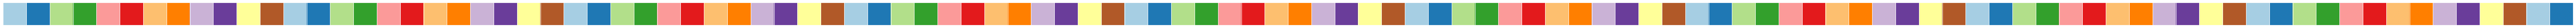

In [17]:
sns.set() 
sns.palplot(sns.color_palette('Paired', n_colors=110))

In [18]:
sns.choose_colorbrewer_palette('qualitative')

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804),
 (0.3019607843137256, 0.6862745098039216, 0.29019607843137263),
 (0.5960784313725492, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (0.9999999999999998, 1.0, 0.19999999999999996),
 (0.6509803921568629, 0.33725490196078434, 0.1568627450980391),
 (0.9686274509803922, 0.5058823529411766, 0.7490196078431374),
 (0.6, 0.6, 0.6)]

In [19]:
cnt_df

,细分行业,0220
0,软件服务,11
1,元器件,10
2,专用机械,8
3,化工原料,7
4,证券,6
5,半导体,6
6,电气设备,5
7,通信设备,4
8,塑料,3
9,家用电器,3


In [33]:
board_size = dict(银行=36, 全国地产=35, 生物制药=49, 环境保护=78, 区域地产=64, 酒店餐饮=9, 运输设备=23, 综合类=35, 建筑工程=89, 玻璃=19, 家用电器=44, 文教休闲=37,
                  其他商业=13, 元器件=184, IT设备=36, 其他建材=28, 汽车服务=11, 火力发电=32, 医药商业=25, 汽车配件=141, 广告包装=41, 轻工机械=10, 新型电力=13,
                  多元金融=31, 饲料=17, 电气设备=176, 房产服务=9, 石油加工=8, 铅锌=13, 农业综合=26, 批发业=7, 通信设备=120, 旅游景点=12, 港口=19, 机场=4,
                  石油贸易=6, 空运=8, 医疗保健=85, 商贸代理=21, 化学制药=104, 影视音像=46, 工程机械=28, 软件服务=199, 证券=44, 化纤=26, 水泥=21, 专用机械=142,
                  供气供热=29, 农药化肥=43, 机床制造=14, 百货=43, 中成药=69, 路桥=19, 造纸=25, 食品=64, 黄金=13, 化工原料=167, 矿物制品=19, 水运=12,
                  日用化工=11, 机械基件=74, 汽车整车=23, 煤炭开采=29, 铁路=5, 染料涂料=22, 白酒=19, 林业=4, 水务=11, 水力发电=21, 互联网=72, 旅游服务=12,
                  纺织=39, 铝=25, 保险=7, 园区开发=16, 小金属=33, 铜=13, 普钢=25, 航空=24, 特种钢=10, 种植业=14, 出版业=23, 焦炭加工=7, 啤酒=7, 公路=7,
                  超市连锁=11, 钢加工=24, 渔业=8, 农用机械=9, 软饮料=6, 化工机械=10, 塑料=48, 红黄酒=10, 橡胶=12, 家居用品=40, 摩托车=7, 电器仪表=65, 服饰=56,
                  仓储物流=38, 纺织机械=10, 电器连锁=2, 装修装饰=26, 半导体=61, 电信运营=9, 石油开采=18, 乳制品=12, 商品城=3, 公共交通=8, 船舶=7, 陶瓷=6)

# cnt_df['占比'] = cnt_df['0220']/2
size = []
for industry in cnt_df['细分行业']:
     size.append(board_size[industry])
        

cnt_df['占比'] = size
cnt_df.head(5)

,细分行业,0220,占比
0,软件服务,11,199
1,元器件,10,184
2,专用机械,8,142
3,化工原料,7,167
4,证券,6,44


In [48]:
cnt_df['pct'] = cnt_df['0220']/cnt_df['占比']
cnt_df.head(5)

,细分行业,0220,占比,pct
0,软件服务,11,199.0,0.055276
1,元器件,10,184.0,0.054348
2,专用机械,8,142.0,0.056338
3,化工原料,7,167.0,0.041916
4,证券,6,44.0,0.136364


In [49]:
cnt_df['pct'] = cnt_df['pct'].apply(lambda x: format(x, '.1%')) 

In [50]:
cnt_df

,细分行业,0220,占比,pct
0,软件服务,11,199.0,5.5%
1,元器件,10,184.0,5.4%
2,专用机械,8,142.0,5.6%
3,化工原料,7,167.0,4.2%
4,证券,6,44.0,13.6%
5,半导体,6,61.0,9.8%
6,电气设备,5,176.0,2.8%
7,通信设备,4,120.0,3.3%
8,塑料,3,48.0,6.2%
9,家用电器,3,44.0,6.8%
